### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df = pd.read_csv("titanic.csv")

### Data Understanding

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df, head=5)

##################### Shape #####################
(891, 12)
##################### Types #####################
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
##################### Head #####################
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jac

<AxesSubplot:>

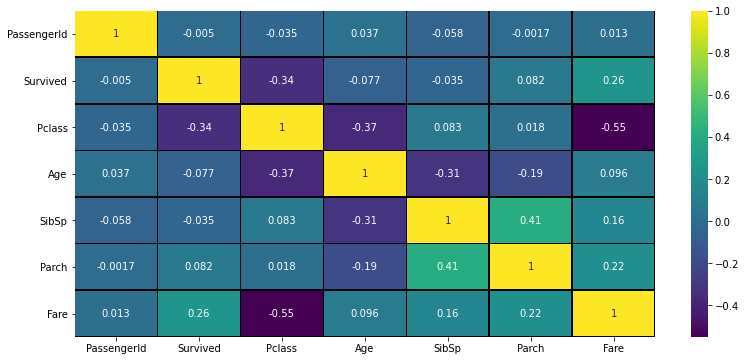

In [5]:
corr = df.corr() 
plt.figure(figsize=(13,6))
sns.heatmap(corr,annot=True,linecolor="black",cmap='viridis',lw=0.5) 

### Target Visualization

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

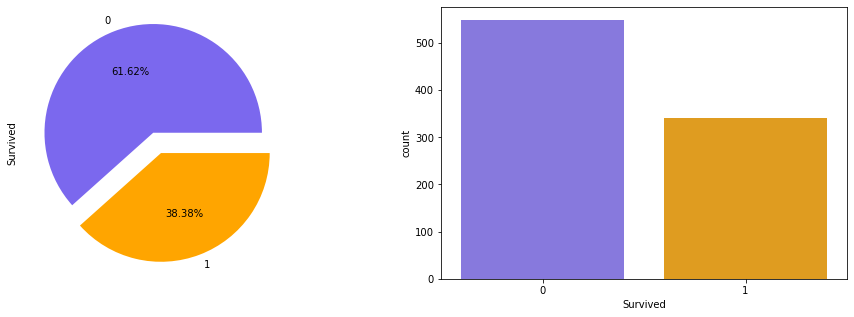

In [6]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) 
df["Survived"].value_counts().plot.pie(autopct="%.2f%%",colors=['mediumslateblue','orange'],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df["Survived"],ax=ax[1],palette=['mediumslateblue','orange'])

### Feature Engineering

In [7]:
df.columns = [col.upper() for col in df.columns]

In [8]:
# Cabin bool
df["NEW_CABIN_BOOL"] = df["CABIN"].notnull().astype('int')

In [9]:
# Name count
df["NEW_NAME_COUNT"] = df["NAME"].str.len()

In [10]:
# name word count
df["NEW_NAME_WORD_COUNT"] = df["NAME"].apply(lambda x: len(str(x).split(" ")))

In [11]:
# name dr
df["NEW_NAME_DR"] = df["NAME"].apply(lambda x: len([x for x in x.split() if x.startswith("Dr")]))

In [12]:
# name title
df['NEW_TITLE'] = df.NAME.str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
df

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,23,4,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,51,7,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,3,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,44,7,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,24,4,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,21,3,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,28,4,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,40,5,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,21,4,0,Mr


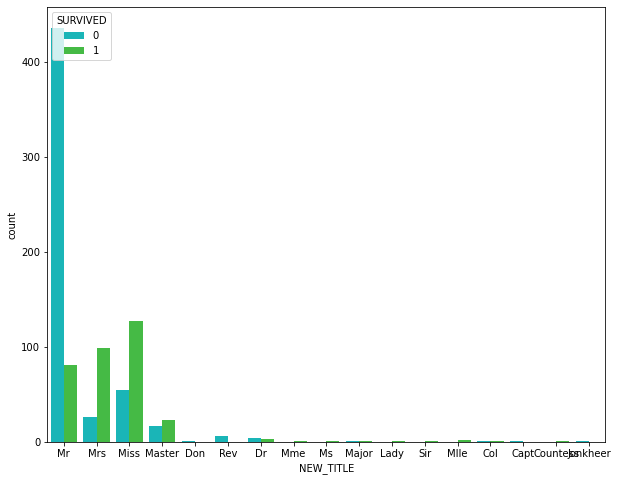

In [14]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='NEW_TITLE', hue='SURVIVED',palette=["darkturquoise","limegreen"], data=df)

In [15]:
# family size
df["NEW_FAMILY_SIZE"] = df["SIBSP"] + df["PARCH"] + 1

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


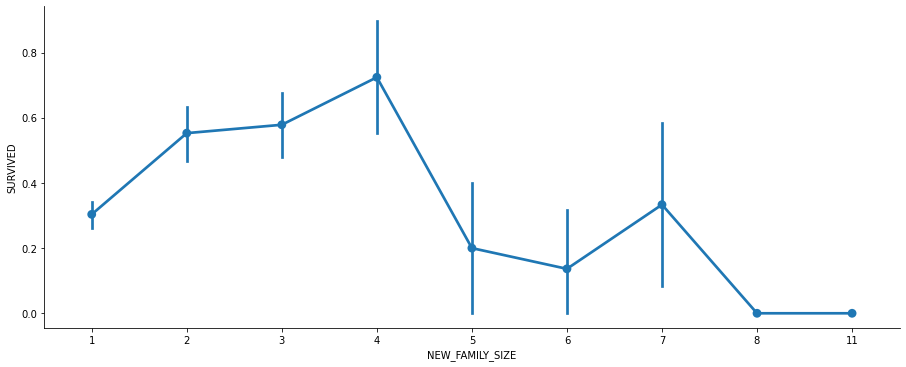

In [16]:
axes = sns.factorplot('NEW_FAMILY_SIZE','SURVIVED', 
                      data=df, aspect = 2.5)

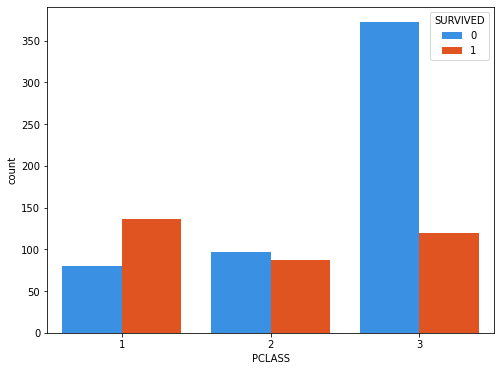

In [17]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='PCLASS', hue='SURVIVED',palette=["dodgerblue","orangered"], data=df)

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


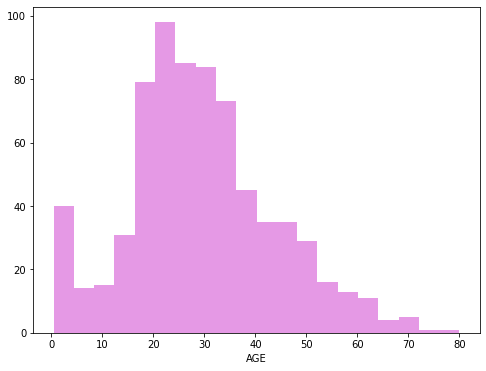

In [18]:
plt.figure(figsize=(8,6))
ax = sns.distplot(df['AGE'],kde=False,color='m')

In [19]:
# age_pclass
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

In [20]:
# is alone
df.loc[((df['SIBSP'] + df['PARCH']) > 0), "NEW_IS_ALONE"] = "NO"
df.loc[((df['SIBSP'] + df['PARCH']) == 0), "NEW_IS_ALONE"] = "YES"

In [21]:
df.head()

,PASSENGERID,SURVIVED,PCLASS,NAME,SEX,AGE,SIBSP,PARCH,TICKET,FARE,CABIN,EMBARKED,NEW_CABIN_BOOL,NEW_NAME_COUNT,NEW_NAME_WORD_COUNT,NEW_NAME_DR,NEW_TITLE,NEW_FAMILY_SIZE,NEW_AGE_PCLASS,NEW_IS_ALONE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,23,4,0,Mr,2,66.0,NO
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,51,7,0,Mrs,2,38.0,NO
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,22,3,0,Miss,1,78.0,YES
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,44,7,0,Mrs,2,35.0,NO
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,24,4,0,Mr,1,105.0,YES


In [22]:
df.shape

(891, 20)

In [23]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [24]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 20
cat_cols: 12
num_cols: 5
cat_but_car: 3
num_but_cat: 8


In [25]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

### Outlier Data Control

In [26]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [27]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [28]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE True
FARE True
NEW_NAME_COUNT True
NEW_AGE_PCLASS True


In [29]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [30]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [31]:
for col in num_cols:
    print(col, check_outlier(df, col))

AGE False
FARE False
NEW_NAME_COUNT False
NEW_AGE_PCLASS False


### Missing Value Control

In [32]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("red", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return

In [33]:
missing_value_table(df)

,Missing Values,% Value
CABIN,687,77
AGE,177,19
NEW_AGE_PCLASS,177,19
EMBARKED,2,0
NEW_IS_ALONE,0,0
PARCH,0,0
SURVIVED,0,0
PCLASS,0,0
NAME,0,0
SEX,0,0


In [34]:
df.drop("CABIN", inplace=True, axis=1)

In [35]:
remove_cols = ["TICKET", "NAME"]
df.drop(remove_cols, inplace=True, axis=1)

In [36]:
df["AGE"] = df["AGE"].fillna(df.groupby("NEW_TITLE")["AGE"].transform("median"))

In [37]:
df["NEW_AGE_PCLASS"] = df["AGE"] * df["PCLASS"]

In [38]:
df.loc[(df['AGE'] < 18), 'NEW_AGE_CAT'] = 'young'
df.loc[(df['AGE'] >= 18) & (df['AGE'] < 56), 'NEW_AGE_CAT'] = 'mature'
df.loc[(df['AGE'] >= 56), 'NEW_AGE_CAT'] = 'senior'

In [39]:
df.loc[(df['SEX'] == 'male') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngmale'
df.loc[(df['SEX'] == 'male') & ((df['AGE'] > 21) & (df['AGE']) < 50), 'NEW_SEX_CAT'] = 'maturemale'
df.loc[(df['SEX'] == 'male') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniormale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] <= 21), 'NEW_SEX_CAT'] = 'youngfemale'
df.loc[(df['SEX'] == 'female') & ((df['AGE'] > 21) & (df['AGE']) < 50), 'NEW_SEX_CAT'] = 'maturefemale'
df.loc[(df['SEX'] == 'female') & (df['AGE'] > 50), 'NEW_SEX_CAT'] = 'seniorfemale'

In [40]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= 10) else x, axis=0)

### Data Transformation

#### Label Encoding

In [41]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [42]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
                   and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)

#### Rare Encoding

In [43]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [44]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

In [45]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT     RATIO  TARGET_MEAN
0    314  0.352413     0.742038
1    577  0.647587     0.188908


EMBARKED : 3
   COUNT     RATIO  TARGET_MEAN
C    168  0.188552     0.553571
Q     77  0.086420     0.389610
S    646  0.725028     0.339009


NEW_TITLE : 17
          COUNT     RATIO  TARGET_MEAN
Capt          1  0.001122     0.000000
Col           2  0.002245     0.500000
Countess      1  0.001122     1.000000
Don           1  0.001122     0.000000
Dr            7  0.007856     0.428571
Jonkheer      1  0.001122     0.000000
Lady          1  0.001122     1.000000
Major         2  0.002245     0.500000
Master       40  0.044893     0.575000
Miss        182  0.204265     0.697802
Mlle          2  0.002245     1.000000
Mme           1  0.001122     1.000000
Mr          517  0.580247     0.156673
Mrs         125  0.140292     0.792000
Ms            1  0.001122     1.000000
Rev           6  0.006734     0.000000
Sir           1  0.001122     1.000000


NEW_IS_ALONE : 2
   COUNT     RA

In [46]:
df = rare_encoder(df, 0.01)

In [47]:
df["NEW_TITLE"].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: NEW_TITLE, dtype: int64

In [48]:
rare_analyser(df, "SURVIVED", cat_cols)

SEX : 2
   COUNT     RATIO  TARGET_MEAN
0    314  0.352413     0.742038
1    577  0.647587     0.188908


EMBARKED : 3
   COUNT     RATIO  TARGET_MEAN
C    168  0.188552     0.553571
Q     77  0.086420     0.389610
S    646  0.725028     0.339009


NEW_TITLE : 5
        COUNT     RATIO  TARGET_MEAN
Master     40  0.044893     0.575000
Miss      182  0.204265     0.697802
Mr        517  0.580247     0.156673
Mrs       125  0.140292     0.792000
Rare       27  0.030303     0.444444


NEW_IS_ALONE : 2
   COUNT     RATIO  TARGET_MEAN
0    354  0.397306     0.505650
1    537  0.602694     0.303538


SURVIVED : 2
   COUNT     RATIO  TARGET_MEAN
0    549  0.616162            0
1    342  0.383838            1


PCLASS : 3
   COUNT     RATIO  TARGET_MEAN
1    216  0.242424     0.629630
2    184  0.206510     0.472826
3    491  0.551066     0.242363


SIBSP : 7
   COUNT     RATIO  TARGET_MEAN
0    608  0.682379     0.345395
1    209  0.234568     0.535885
2     28  0.031425     0.464286
3     16

#### One-Hot Encoding

In [49]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [50]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols)

In [51]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 891
Variables: 59
cat_cols: 54
num_cols: 5
cat_but_car: 0
num_but_cat: 54


In [52]:
num_cols = [col for col in num_cols if "PASSENGERID" not in col]

In [53]:
rare_analyser(df, "SURVIVED", cat_cols)

SURVIVED : 2
   COUNT     RATIO  TARGET_MEAN
0    549  0.616162            0
1    342  0.383838            1


SEX : 2
   COUNT     RATIO  TARGET_MEAN
0    314  0.352413     0.742038
1    577  0.647587     0.188908


NEW_CABIN_BOOL : 2
   COUNT     RATIO  TARGET_MEAN
0    687  0.771044     0.299854
1    204  0.228956     0.666667


NEW_NAME_DR : 2
   COUNT     RATIO  TARGET_MEAN
0    881  0.988777      0.38252
1     10  0.011223      0.50000


NEW_IS_ALONE : 2
   COUNT     RATIO  TARGET_MEAN
0    354  0.397306     0.505650
1    537  0.602694     0.303538


PCLASS_1 : 2
   COUNT     RATIO  TARGET_MEAN
0    675  0.757576     0.305185
1    216  0.242424     0.629630


PCLASS_2 : 2
   COUNT    RATIO  TARGET_MEAN
0    707  0.79349     0.360679
1    184  0.20651     0.472826


PCLASS_3 : 2
   COUNT     RATIO  TARGET_MEAN
0    400  0.448934     0.557500
1    491  0.551066     0.242363


SIBSP_0 : 2
   COUNT     RATIO  TARGET_MEAN
0    283  0.317621     0.466431
1    608  0.682379     0.345395

In [54]:
(df["SEX"].value_counts() / len(df) < 0.01).any()

False

In [55]:
(df["NEW_NAME_WORD_COUNT_9"].value_counts() / len(df) < 0.01).any()

True

In [56]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                    (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

### Standart Scaler

In [57]:
num_cols

['AGE', 'FARE', 'NEW_NAME_COUNT', 'NEW_AGE_PCLASS']

In [58]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df[num_cols].head()

,AGE,FARE,NEW_NAME_COUNT,NEW_AGE_PCLASS
0,-0.560638,-0.820552,-0.436675,0.066488
1,0.663302,2.031623,2.248303,-0.790429
2,-0.254653,-0.787578,-0.558720,0.433739
3,0.433813,1.419297,2.126258,-0.882241
4,0.433813,-0.781471,-0.314631,1.260052


In [59]:
check_df(df)

##################### Shape #####################
(891, 59)
##################### Types #####################
PASSENGERID                   int64
SURVIVED                      int64
SEX                           int64
AGE                         float64
FARE                        float64
NEW_CABIN_BOOL                int64
NEW_NAME_COUNT              float64
NEW_NAME_DR                   int64
NEW_AGE_PCLASS              float64
NEW_IS_ALONE                  int64
PCLASS_1                      uint8
PCLASS_2                      uint8
PCLASS_3                      uint8
SIBSP_0                       uint8
SIBSP_1                       uint8
SIBSP_2                       uint8
SIBSP_3                       uint8
SIBSP_4                       uint8
SIBSP_5                       uint8
SIBSP_8                       uint8
PARCH_0                       uint8
PARCH_1                       uint8
PARCH_2                       uint8
PARCH_3                       uint8
PARCH_4                   

### Save Csv

In [60]:
df.to_csv('prep_titanic.csv') 